# Dados Datasus :: Quadros de Saúde
[Quadros de Saúde no Pypi](https://pypi.org/project/quadrosdesaude/)

[Github do projeto](https://github.com/drandreq/quadrosdesaude)

[Documentação do projeto](https://drandreq.github.io/quadrosdesaude/)

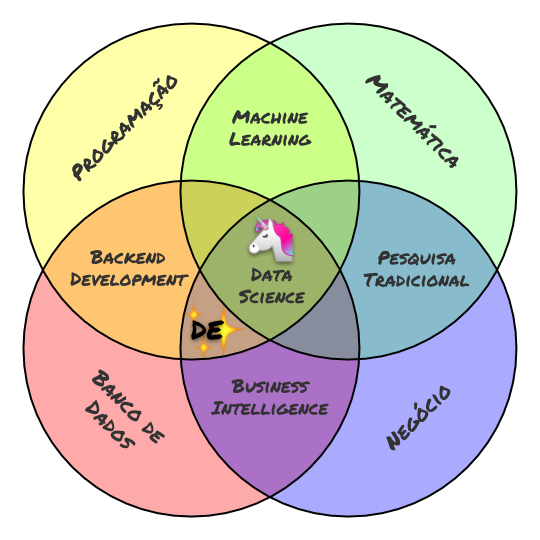

## Instalação do pacote

In [ ]:
!pip install quadrosdesaude
!pip install dbfread

##

## Importação do pacote:

In [ ]:
import quadrosdesaude as qds
import os
from pathlib import Path

# Local no FTP
FTP_PATH = "/dissemin/publicos/SIM/CID10/DORES/"

# Nome do arquivo que queremos baixar.
FILENAME = "DOBR2019.dbc"

# Pasta local onde queremos salvar o arquivo baixado.
DEST_FOLDER = "destino_local"

# --- 2. Criação da Pasta Local ---
os.makedirs(DEST_FOLDER, exist_ok=True)
print(f"Pasta de destino '{DEST_FOLDER}' pronta.")

# --- 3. Execução do Download ---
print(f"Iniciando o download do arquivo: {FILENAME}...")

try:
    # Esta função cuida da conexão FTP e do download
    qds.ftp_download_arquivo(
        ftp_path=FTP_PATH,
        filename=FILENAME,
        destination_folder=DEST_FOLDER
    )

    # --- 4. Verificação ---
    caminho_final = Path(DEST_FOLDER) / FILENAME
    if caminho_final.exists():
        print(f"\n✅ Download concluído com sucesso!")
        print(f"Arquivo salvo em: {caminho_final.resolve()}")
    else:
        print(f"\n❌ Ocorreu um erro e o arquivo não foi encontrado em: {caminho_final.resolve()}")

except Exception as e:
    print(f"\n❌ Falha no download: {e}")

Pasta de destino 'destino_local' pronta.
Iniciando o download do arquivo: DOBR2019.dbc...


DOBR2019.dbc: 100%|██████████| 103M/103M [02:13<00:00, 814kB/s]



✅ Download concluído com sucesso!
Arquivo salvo em: /content/destino_local/DOBR2019.dbc


In [ ]:
import quadrosdesaude as qds
import os
from pathlib import Path

# --- 1. Definir os Caminhos ---

# Caminho completo para o arquivo .dbc de entrada
caminho_dbc_entrada = Path("/content/destino_local/DOBR2019.dbc")

# Define o caminho de saída, trocando a extensão para .dbf no mesmo diretório
caminho_dbf_saida = caminho_dbc_entrada.with_suffix(".dbf")

# Garante que o diretório de destino exista
# (Embora neste caso seja o mesmo do arquivo de entrada)
os.makedirs(caminho_dbc_entrada.parent, exist_ok=True)

print(f"Iniciando descompressão de:")
print(f"  Entrada: {caminho_dbc_entrada}")
print(f"  Saída:   {caminho_dbf_saida}")

# --- 2. Executar a Descompressão ---

try:
    # A função 'dbc2dbf' é a ideal para esta etapa (DBC -> DBF)
    sucesso = qds.dbc2dbf(
        caminho_dbc=str(caminho_dbc_entrada),
        caminho_dbf=str(caminho_dbf_saida)
    )

    if sucesso:
        print(f"\n✅ Arquivo descomprimido com sucesso!")
        print(f"Verifique o arquivo em: {caminho_dbf_saida}")
    else:
        print(f"\n❌ Falha na descompressão.")

except FileNotFoundError:
    print(f"\n❌ ERRO: O arquivo de entrada não foi encontrado em: {caminho_dbc_entrada}")
except Exception as e:
    # A extensão C pode reportar outros erros (ex: arquivo corrompido)
    print(f"\n❌ Ocorreu um erro inesperado durante a descompressão: {e}")
    print("Por favor, verifique se o arquivo .dbc não está corrompido.")

Iniciando descompressão de:
  Entrada: /content/destino_local/DOBR2019.dbc
  Saída:   /content/destino_local/DOBR2019.dbf

✅ Arquivo descomprimido com sucesso!
Verifique o arquivo em: /content/destino_local/DOBR2019.dbf


In [ ]:
import os
from pathlib import Path

# Tenta importar a função de formatação diretamente do pacote
try:
    from quadrosdesaude.utils import formatar_tamanho
except ImportError:
    # Caso a função não seja encontrada (embora deva estar no pacote),
    # usamos uma função de fallback simples para formatar.
    def formatar_tamanho(num_bytes: int) -> str:
        if num_bytes is None: return "0 Bytes"
        if num_bytes < 1024: return f"{num_bytes} Bytes"
        if num_bytes < 1024**2: return f"{num_bytes/1024:.2f} KB"
        if num_bytes < 1024**3: return f"{num_bytes/(1024**2):.2f} MB"
        if num_bytes < 1024**4: return f"{num_bytes/(1024**3):.2f} GB"
        return f"{num_bytes/(1024**4):.2f} TB"

# --- 1. Definir o Caminho do Arquivo ---
# Este é o caminho do arquivo de saída que você definiu na etapa anterior
caminho_dbf = Path("/content/destino_local/DOBR2019.dbf")

# --- 2. Verificar se o arquivo existe e obter o tamanho ---
try:
    if caminho_dbf.exists():
        # Obter o tamanho em bytes
        tamanho_em_bytes = os.path.getsize(caminho_dbf)

        # Formatar o tamanho usando a função
        tamanho_formatado = formatar_tamanho(tamanho_em_bytes)

        print(f"🔎 O tamanho do arquivo é:")
        print(f"  Arquivo: {caminho_dbf.name}")
        print(f"  Tamanho: {tamanho_formatado}")
        print(f"  (Tamanho exato: {tamanho_em_bytes:,} bytes)")
    else:
        print(f"❌ ERRO: O arquivo não foi encontrado em: {caminho_dbf}")
        print("Por favor, verifique se a etapa de descompressão foi concluída com sucesso.")

except Exception as e:
    print(f"❌ Ocorreu um erro ao tentar medir o arquivo: {e}")

🔎 O tamanho do arquivo é:
  Arquivo: DOBR2019.dbf
  Tamanho: 630.77 MB
  (Tamanho exato: 661,405,308 bytes)


In [ ]:
import quadrosdesaude as qds
import os
from pathlib import Path

# --- 1. Definir os Caminhos ---

# Caminho do arquivo .dbf que você acabou de criar
caminho_dbf_entrada = Path("/content/destino_local/DOBR2019.dbf")

# Caminho de saída para o novo arquivo .parquet
# Vamos salvá-lo na mesma pasta, mudando a extensão
caminho_parquet_saida = caminho_dbf_entrada.with_suffix(".parquet")

# Garante que o diretório exista
os.makedirs(caminho_dbf_entrada.parent, exist_ok=True)

print(f"Iniciando conversão DBF -> Parquet:")
print(f"  Entrada: {caminho_dbf_entrada}")
print(f"  Saída:   {caminho_parquet_saida}")
print("Aguarde, este processo pode levar um tempo...")

# --- 2. Executar a Conversão ---

try:
    # A função dbf2parquet lê o DBF em lotes e escreve o Parquet
    sucesso = qds.dbf2parquet(
        caminho_dbf=str(caminho_dbf_entrada),
        destino_parquet=str(caminho_parquet_saida),
        # O tamanho_lote é opcional, 100000 é um bom valor padrão
        tamanho_lote=250000
    )

    if sucesso:
        print(f"\n✅ Conversão para Parquet concluída com sucesso!")
        print(f"Arquivo final salvo em: {caminho_parquet_saida}")
    else:
        print(f"\n❌ Falha na conversão.")
        print("Isso pode acontecer se a verificação de contagem de linhas falhar.")

except FileNotFoundError:
    print(f"\n❌ ERRO: O arquivo de entrada não foi encontrado em: {caminho_dbf_entrada}")
except Exception as e:
    print(f"\n❌ Ocorreu um erro inesperado durante a conversão: {e}")

Iniciando conversão DBF -> Parquet:
  Entrada: /content/destino_local/DOBR2019.dbf
  Saída:   /content/destino_local/DOBR2019.parquet
Aguarde, este processo pode levar um tempo...

✅ Conversão para Parquet concluída com sucesso!
Arquivo final salvo em: /content/destino_local/DOBR2019.parquet


In [ ]:
import os
from pathlib import Path

# Tenta importar a função de formatação diretamente do pacote
try:
    from quadrosdesaude.utils import formatar_tamanho
except ImportError:
    # Caso a função não seja encontrada (embora deva estar no pacote),
    # usamos uma função de fallback simples para formatar.
    def formatar_tamanho(num_bytes: int) -> str:
        if num_bytes is None: return "0 Bytes"
        if num_bytes < 1024: return f"{num_bytes} Bytes"
        if num_bytes < 1024**2: return f"{num_bytes/1024:.2f} KB"
        if num_bytes < 1024**3: return f"{num_bytes/(1024**2):.2f} MB"
        if num_bytes < 1024**4: return f"{num_bytes/(1024**3):.2f} GB"
        return f"{num_bytes/(1024**4):.2f} TB"

# --- 1. Definir o Caminho do Arquivo ---
# Este é o caminho do arquivo de saída que você definiu na etapa anterior
caminho_parquet = Path("/content/destino_local/DOBR2019.parquet")

# --- 2. Verificar se o arquivo existe e obter o tamanho ---
try:
    if caminho_parquet.exists():
        # Obter o tamanho em bytes
        tamanho_em_bytes = os.path.getsize(caminho_parquet)

        # Formatar o tamanho usando a função
        tamanho_formatado = formatar_tamanho(tamanho_em_bytes)

        print(f"🔎 O tamanho do arquivo é:")
        print(f"  Arquivo: {caminho_dbf.name}")
        print(f"  Tamanho: {tamanho_formatado}")
        print(f"  (Tamanho exato: {tamanho_em_bytes:,} bytes)")
    else:
        print(f"❌ ERRO: O arquivo não foi encontrado em: {caminho_dbf}")
        print("Por favor, verifique se a etapa de descompressão foi concluída com sucesso.")

except Exception as e:
    print(f"❌ Ocorreu um erro ao tentar medir o arquivo: {e}")

🔎 O tamanho do arquivo é:
  Arquivo: DOBR2019.parquet
  Tamanho: 68.29 MB
  (Tamanho exato: 71,611,749 bytes)


In [ ]:
import pandas as pd

caminho_parquet = Path("/content/destino_local/DOBR2019.parquet")
df = pd.read_parquet(caminho_parquet)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349801 entries, 0 to 1349800
Data columns (total 87 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ORIGEM      1349801 non-null  object
 1   TIPOBITO    1349801 non-null  object
 2   DTOBITO     1349801 non-null  object
 3   HORAOBITO   1349801 non-null  object
 4   NATURAL     1349801 non-null  object
 5   CODMUNNATU  1349801 non-null  object
 6   DTNASC      1349801 non-null  object
 7   IDADE       1349801 non-null  object
 8   SEXO        1349801 non-null  object
 9   RACACOR     1349801 non-null  object
 10  ESTCIV      1349801 non-null  object
 11  ESC         1349801 non-null  object
 12  ESC2010     1349801 non-null  object
 13  SERIESCFAL  1349801 non-null  object
 14  OCUP        1349801 non-null  object
 15  CODMUNRES   1349801 non-null  object
 16  LOCOCOR     1349801 non-null  object
 17  CODESTAB    1349801 non-null  object
 18  ESTABDESCR  1349801 non-null  object
 19  

# Duck DB: introdução

## Instalação DuckDB

In [ ]:
!pip install duckdb

## Implementando de modo simples o DuckDB 🦆

In [ ]:
import duckdb

print("--- Iniciando conexão com o DuckDB ---")

# 1. Conectar (ou criar) um banco de dados

# O DuckDB criará um arquivo chamado 'meu_banco.duckdb' no mesmo diretório
con = duckdb.connect(database='meu_banco.duckdb')

print("Conexão estabelecida.")

# 2. Criar uma tabela (se ela ainda não existir)
# Usamos SQL padrão para isso.
con.execute("""
    CREATE TABLE IF NOT EXISTS produtos (
      id INTEGER,
      nome VARCHAR,
      preco DECIMAL(10, 2)
    )
""")

print("Tabela 'produtos' verificada/criada.")

# 3. Inserir dados
# Para evitar duplicatas, podemos verificar antes (embora haja formas mais eficientes)
# Vamos apenas inserir alguns dados para este exemplo.
print("Inserindo dados...")
con.execute("INSERT INTO produtos VALUES (1, 'Laptop', 1200.50)")
con.execute("INSERT INTO produtos VALUES (2, 'Mouse', 25.99)")
con.execute("INSERT INTO produtos VALUES (3, 'Teclado', 75.00)")

print("Dados inseridos.")

# 4. Consultar (ler) os dados da tabela
print("\n--- Consultando todos os produtos: ---")
resultado = con.execute("SELECT * FROM produtos")

# 5. Mostrar os resultados
# .fetchall() busca todos os resultados da consulta
registros = resultado.fetchall()
for linha in registros:
  print(linha)

# 6. Consultar dados com filtro (WHERE)
print("\n--- Consultando produtos caros (preco > 100): ---")
resultado_caro = con.execute("SELECT nome, preco FROM produtos WHERE preco > 100")

# O DuckDB também se integra facilmente com a biblioteca Pandas
# Mas, por enquanto, vamos usar o .fetchall()
print(resultado_caro.fetchall())


# 7. Fechar a conexão
con.close()
print("\n--- Conexão fechada. Programa concluído. ---")

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.
Tabela 'produtos' verificada/criada.
Inserindo dados...
Dados inseridos.

--- Consultando todos os produtos: ---
(1, 'Laptop', Decimal('1200.50'))
(2, 'Mouse', Decimal('25.99'))
(3, 'Teclado', Decimal('75.00'))

--- Consultando produtos caros (preco > 100): ---
[('Laptop', Decimal('1200.50'))]

--- Conexão fechada. Programa concluído. ---


In [ ]:
import duckdb

print("--- Iniciando conexão com o DuckDB ---")

# 1. Conectar ao MESMO banco de dados de antes
con = duckdb.connect(database='meu_banco.duckdb')

print("Conexão estabelecida com 'meu_banco.duckdb'.")

# 2. Criar a nova tabela 'pacientes'
con.execute("""
    CREATE TABLE IF NOT EXISTS pacientes (
      id INTEGER,
      nome VARCHAR,
      idade INTEGER,
      tipo_sanguineo VARCHAR(3)
    )
""")

print("Tabela 'pacientes' verificada/criada.")

# 3. Limpar a tabela antes de inserir (Opcional, mas bom para testes)
# Para evitar que os dados sejam duplicados CADA vez que você rodar o script,
# nós podemos apagar todos os registros antigos primeiro.
con.execute("DELETE FROM pacientes")
print("Registros antigos de 'pacientes' apagados (para evitar duplicatas).")

# 4. Inserir novos dados de saúde
print("Inserindo dados de pacientes...")
con.execute("INSERT INTO pacientes VALUES (1, 'Ana Silva', 34, 'A+')")
con.execute("INSERT INTO pacientes VALUES (2, 'Bruno Costa', 45, 'O-')")
con.execute("INSERT INTO pacientes VALUES (3, 'Carla Dias', 29, 'B+')")
con.execute("INSERT INTO pacientes VALUES (4, 'Daniel Moreira', 52, 'AB+')")

print("Novos dados inseridos.")

# 5. Consultar TODOS os pacientes
print("\n--- Consultando TODOS os pacientes: ---")
resultado_todos = con.execute("SELECT * FROM pacientes")
print(resultado_todos.fetchall())

# 6. Consultar pacientes com filtro (exemplo de saúde)
print("\n--- Consultando pacientes com mais de 40 anos: ---")
resultado_filtro = con.execute("""
    SELECT nome, idade, tipo_sanguineo
    FROM pacientes
    WHERE idade > 40
""").df()

print(resultado_filtro.head())


# 7. Fechar a conexão
con.close()
print("\n--- Conexão fechada. Programa concluído. ---")

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida com 'meu_banco.duckdb'.
Tabela 'pacientes' verificada/criada.
Registros antigos de 'pacientes' apagados (para evitar duplicatas).
Inserindo dados de pacientes...
Novos dados inseridos.

--- Consultando TODOS os pacientes: ---
[(1, 'Ana Silva', 34, 'A+'), (2, 'Bruno Costa', 45, 'O-'), (3, 'Carla Dias', 29, 'B+'), (4, 'Daniel Moreira', 52, 'AB+')]

--- Consultando pacientes com mais de 40 anos: ---
             nome  idade tipo_sanguineo
0     Bruno Costa     45             O-
1  Daniel Moreira     52            AB+

--- Conexão fechada. Programa concluído. ---


In [ ]:
query = """
  SELECT
    id,
    nome,
    idade,
    tipo_sanguineo
  FROM pacientes
  WHERE
    idade > 50
"""

con = duckdb.connect(database='meu_banco.duckdb')
dataframe = con.execute(query).df()
dataframe.head()

,id,nome,idade,tipo_sanguineo
0,4,Daniel Moreira,52,AB+


## Inserindo mais pacientes aleatorios usando python:

In [ ]:
import duckdb
import random # Importamos a biblioteca para gerar dados aleatórios

print("--- Iniciando conexão com o DuckDB ---")
con = duckdb.connect(database='meu_banco.duckdb')
print("Conexão estabelecida com 'meu_banco.duckdb'.")

# --- Estrutura e Limpeza ---
con.execute("""
    CREATE TABLE IF NOT EXISTS pacientes (
        id INTEGER,
        nome VARCHAR,
        idade INTEGER,
        tipo_sanguineo VARCHAR(3)
    )
""")

# Começamos com a tabela limpa para este exemplo
con.execute("DELETE FROM pacientes")
print("Tabela 'pacientes' limpa para começar a inserção.")

# --- Inserção dos 4 Pacientes Principais ---
print("Inserindo 4 pacientes principais...")
pacientes_principais = [
    (1, 'Ana Silva', 34, 'A+'),
    (2, 'Bruno Costa', 45, 'O-'),
    (3, 'Carla Dias', 29, 'B+'),
    (4, 'Daniel Moreira', 52, 'AB+')
]

# Inserindo os 4 de uma vez
for paciente in pacientes_principais:
    con.execute("INSERT INTO pacientes VALUES (?, ?, ?, ?)", paciente)

print("Pacientes principais inseridos.")

# --- Geração dos 30 Pacientes Aleatórios ---
print(f"Gerando e inserindo 30 novos pacientes aleatórios...")

# Listas de dados para geração
primeiros_nomes = ['Lucas', 'Sofia', 'Mateus', 'Julia', 'Enzo', 'Laura', 'Pedro', 'Maria', 'Gabriel', 'Alice']
sobrenomes = ['Ferreira', 'Alves', 'Pereira', 'Lima', 'Gomes', 'Ribeiro', 'Martins', 'Melo']
tipos_sanguineos = ['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-']

# Loop para gerar 30 pacientes
for i in range(30):
    # IDs devem ser únicos. Começaremos do ID 5 (pois já temos 1, 2, 3, 4)
    novo_id = i + 5

    # Escolhendo dados aleatórios das listas
    nome = random.choice(primeiros_nomes)
    sobrenome = random.choice(sobrenomes)
    nome_completo = f"{nome} {sobrenome}"

    idade = random.randint(18, 75) # Gera uma idade entre 18 e 75
    tipo_s = random.choice(tipos_sanguineos)

    # Inserindo o paciente gerado usando PARÂMETROS
    con.execute("INSERT INTO pacientes VALUES (?, ?, ?, ?)", [novo_id, nome_completo, idade, tipo_s])

print("30 novos pacientes inseridos.")

# --- Consultas ---

# 1. Consulta para provar o total
# Usamos COUNT(*) para contar o número total de linhas
contagem = con.execute("SELECT COUNT(*) FROM pacientes").fetchone()
print("\n" + "="*40)
print(f"Total de pacientes na tabela: {contagem[0]}")
print("="*40 + "\n")

# 2. Consulta para ver alguns dos dados (com Pandas)
print("--- Amostra de 10 pacientes da tabela (com Pandas): ---")
# Usamos o .limit(10) do SQL para não imprimir os 34
df_amostra = con.execute("SELECT * FROM pacientes ORDER BY id DESC LIMIT 10").df()
print(df_amostra)

# Fechar a conexão
con.close()
print("\n--- Conexão fechada. Programa concluído. ---")

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida com 'meu_banco.duckdb'.
Tabela 'pacientes' limpa para começar a inserção.
Inserindo 4 pacientes principais...
Pacientes principais inseridos.
Gerando e inserindo 30 novos pacientes aleatórios...
30 novos pacientes inseridos.

Total de pacientes na tabela: 34

--- Amostra de 10 pacientes da tabela (com Pandas): ---
   id            nome  idade tipo_sanguineo
0  34  Mateus Ribeiro     70            AB-
1  33  Sofia Ferreira     69             A-
2  32     Maria Gomes     47            AB+
3  31  Julia Ferreira     63             A-
4  30      Alice Melo     61            AB-
5  29  Laura Ferreira     48             O-
6  28       Enzo Melo     69             A+
7  27      Alice Lima     63             O+
8  26  Mateus Martins     55             B+
9  25  Lucas Ferreira     46             A-

--- Conexão fechada. Programa concluído. ---


In [ ]:
query = """
  SELECT
    tipo_sanguineo,
    MIN(idade) AS idade_mais_jovem_por_grupo,
    MAX(idade) AS idade_mais_velho_por_grupo,
    AVG(idade) AS media_idade_por_grupo,
    SUM(idade) AS soma_idades_por_grupo
  FROM pacientes

  GROUP BY
    tipo_sanguineo
"""

con = duckdb.connect(database='meu_banco.duckdb')
dataframe = con.execute(query).df()
dataframe

,tipo_sanguineo,idade_mais_jovem_por_grupo,idade_mais_velho_por_grupo,media_idade_por_grupo,soma_idades_por_grupo
0,O-,23,64,48.800000,244.0
1,B+,29,64,46.000000,230.0
2,AB-,60,73,67.200000,336.0
3,A-,46,69,59.333333,178.0
4,A+,34,71,60.833333,365.0
5,AB+,47,61,53.333333,160.0
6,B-,21,68,50.750000,203.0
7,O+,18,64,48.333333,145.0


# Duck DB: Datasus

In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  describe_df = con.execute(f"""
    SELECT COUNT(*)
    FROM '{caminho_do_arquivo}'
  """).df()
  print(f"Existem {describe_df} linhas na tabela {caminho_do_arquivo}")

  describe_df = con.execute(f"""
    SELECT *
    FROM parquet_schema('{caminho_do_arquivo}')
  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.
Existem    count_star()
0       1349801 linhas na tabela /content/destino_local/DOBR2019.parquet


In [ ]:
describe_df
print(f"Existem {len(describe_df['name']) -1} colunas na tabela {caminho_do_arquivo}")
for coluna in sorted(describe_df['name']):
  print(coluna)

Existem 87 colunas na tabela /content/destino_local/DOBR2019.parquet
ACIDTRAB
ALTCAUSA
ASSISTMED
ATESTADO
ATESTANTE
CAUSABAS
CAUSABAS_O
CAUSAMAT
CB_PRE
CIRCOBITO
CIRURGIA
CODESTAB
CODIFICADO
CODMUNNATU
CODMUNOCOR
CODMUNRES
COMUNSVOIM
CONTADOR
DIFDATA
DTATESTADO
DTCADASTRO
DTCADINF
DTCADINV
DTCONCASO
DTCONINV
DTINVESTIG
DTNASC
DTOBITO
DTRECEBIM
DTRECORIGA
ESC
ESC2010
ESCFALAGR1
ESCMAE
ESCMAE2010
ESCMAEAGR1
ESTABDESCR
ESTCIV
EXAME
FONTE
FONTEINV
FONTES
FONTESINF
GESTACAO
GRAVIDEZ
HORAOBITO
IDADE
IDADEMAE
LINHAA
LINHAB
LINHAC
LINHAD
LINHAII
LOCOCOR
MORTEPARTO
NATURAL
NECROPSIA
NUDIASINF
NUDIASOBCO
NUDIASOBIN
NUMEROLOTE
OBITOGRAV
OBITOPARTO
OBITOPUERP
OCUP
OCUPMAE
ORIGEM
PARTO
PESO
QTDFILMORT
QTDFILVIVO
RACACOR
SEMAGESTAC
SERIESCFAL
SERIESCMAE
SEXO
STCODIFICA
STDOEPIDEM
STDONOVA
TIPOBITO
TPMORTEOCO
TPNIVELINV
TPOBITOCOR
TPPOS
TPRESGINFO
VERSAOSCB
VERSAOSIST
schema


In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    SELECT DISTINCT
      CAUSABAS,
      CAUSABAS_O,
      LINHAA,
      LINHAB,
      LINHAC,
      LINHAD,
      LINHAII
    FROM '{caminho_do_arquivo}'
    WHERE
      CAUSABAS ILIKE '%I64%' OR
      CAUSABAS_O ILIKE '%I64%' OR
      LINHAA ILIKE '%I64%' OR
      LINHAB ILIKE '%I64%' OR
      LINHAC ILIKE '%I64%' OR
      LINHAD ILIKE '%I64%' OR
      LINHAII ILIKE '%I64%'

  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df.head()

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


,CAUSABAS,CAUSABAS_O,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII
0,I64,I64,*A419,,*I64X,,*N19X*I10X
1,I638,I638,*I64X,*I638,,,*E119*I10X
2,I64,I64,*J969,*I64X,*G30X,,
3,I519,I519,*R090,*J960,*I64X,*I519,
4,I255,I255,*I255,*I10X,,,*I64X


In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    SELECT

      COUNT(*) AS contagem
    FROM '{caminho_do_arquivo}'
    WHERE
      CAUSABAS ILIKE '%I64%' OR
      CAUSABAS_O ILIKE '%I64%' OR
      LINHAA ILIKE '%I64%' OR
      LINHAB ILIKE '%I64%' OR
      LINHAC ILIKE '%I64%' OR
      LINHAD ILIKE '%I64%' OR
      LINHAII ILIKE '%I64%'

  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df.head()

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


,contagem
0,52005


In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    SELECT

      COUNT(*) AS contagem
    FROM '{caminho_do_arquivo}'
    WHERE
      CAUSABAS ILIKE '%E66%' OR
      CAUSABAS_O ILIKE '%E66%' OR
      LINHAA ILIKE '%E66%' OR
      LINHAB ILIKE '%E66%' OR
      LINHAC ILIKE '%E66%' OR
      LINHAD ILIKE '%E66%' OR
      LINHAII ILIKE '%E66%'

  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df.head()

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,contagem
0,11269


In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    SELECT

      COUNT(*) AS contagem
    FROM '{caminho_do_arquivo}'
    WHERE
      CAUSABAS ILIKE '%R99%' OR
      CAUSABAS_O ILIKE '%R99%' OR
      LINHAA ILIKE '%R99%' OR
      LINHAB ILIKE '%R99%' OR
      LINHAC ILIKE '%R99%' OR
      LINHAD ILIKE '%R99%' OR
      LINHAII ILIKE '%R99%'

  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df.head()

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


,contagem
0,88913


In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    SELECT
      CAUSABAS,
      COUNT(*) AS contagem
    FROM '{caminho_do_arquivo}'
    GROUP BY CAUSABAS
    ORDER BY 2 DESC
  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df.head()

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


,CAUSABAS,contagem
0,I219,92689
1,J189,50044
2,R99,48511
3,I64,33895
4,E149,28613


In [ ]:
import duckdb

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")
caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2019.parquet"

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    DESCRIBE SELECT *
    FROM '{caminho_do_arquivo}'
  """).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df

--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


,column_name,column_type,null,key,default,extra
0,ORIGEM,VARCHAR,YES,None,None,None
1,TIPOBITO,VARCHAR,YES,None,None,None
2,DTOBITO,VARCHAR,YES,None,None,None
3,HORAOBITO,VARCHAR,YES,None,None,None
4,NATURAL,VARCHAR,YES,None,None,None
...,...,...,...,...,...,...
82,MORTEPARTO,VARCHAR,YES,None,None,None
83,DTCONCASO,VARCHAR,YES,None,None,None
84,FONTESINF,VARCHAR,YES,None,None,None
85,ALTCAUSA,VARCHAR,YES,None,None,None


In [ ]:
import duckdb
from pathlib import Path

# caminho_do_arquivo = "/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2021.parquet"
caminho_do_arquivo = Path("/content/destino_local/DOBR2019.parquet")

lista = [f'/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR{ano}.parquet' for ano in range(1996, 2023)]

print("--- Iniciando conexão com o DuckDB ---")
print("Conexão estabelecida.")
con = duckdb.connect(database=':memory:')

try:

  df = con.execute(f"""
    SELECT
      CAUSABAS,
      COUNT(*) AS contagem
    FROM read_parquet(?)

    GROUP BY CAUSABAS
    ORDER BY 2 DESC
  """, [lista]
  ).df()

except Exception as e:
  print(f"\n--- ERRO! ---\nNão foi possível ler o arquivo. Verifique se o caminho está correto.")
  print(f"Erro detalhado: {e}")

finally:
  con.close()

df.head()



--- Iniciando conexão com o DuckDB ---
Conexão estabelecida.


,CAUSABAS,contagem
0,I219,2030656
1,I64,1135332
2,R99,1079926
3,R98,1077874
4,J189,855868


In [ ]:
df.head(20)


,CAUSABAS,contagem
0,I219,2030656
1,I64,1135332
2,R99,1079926
3,R98,1077874
4,J189,855868
5,B342,702934
6,E149,659439
7,C349,554152
8,I10,534483
9,J449,527407


from matplotlib import pyplot as plt
_df_0['contagem'].plot(kind='hist', bins=20, title='contagem')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['contagem'].plot(kind='line', figsize=(8, 4), title='contagem')
plt.gca().spines[['top', 'right']].set_visible(False)

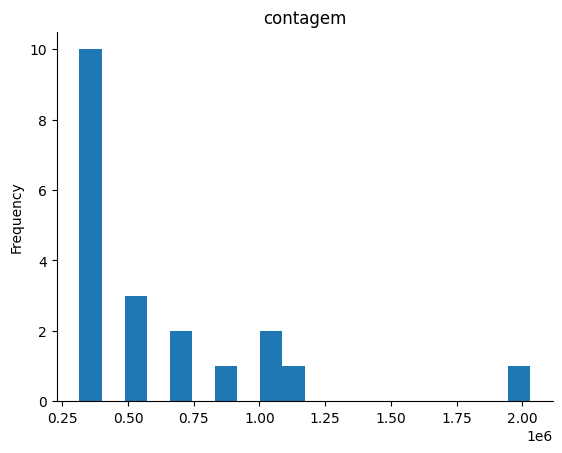

In [ ]:
from matplotlib import pyplot as plt
_df_0['contagem'].plot(kind='hist', bins=20, title='contagem')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import zipfile
import os

def compactar_arquivos(lista_de_arquivos: list, nome_do_zip: str):
    """
    Compacta uma lista de arquivos em um único arquivo .zip.

    Args:
        lista_de_arquivos (list): Uma lista de strings com os caminhos
                                  para os arquivos a serem compactados.
        nome_do_zip (str): O nome do arquivo ZIP a ser criado
                             (ex: 'meu_backup.zip').
    """
    print(f"Iniciando compactação para '{nome_do_zip}'...")

    arquivos_adicionados = 0
    try:
        with zipfile.ZipFile(nome_do_zip, mode='w', compression=zipfile.ZIP_DEFLATED) as zipf:
            for arquivo_path in lista_de_arquivos:
                if os.path.exists(arquivo_path):
                    nome_no_zip = os.path.basename(arquivo_path)
                    zipf.write(arquivo_path, arcname=nome_no_zip)
                    print(f"  [+] Adicionado: {arquivo_path} (como: {nome_no_zip})")
                    arquivos_adicionados += 1
                else:
                    print(f"  [!] ATENÇÃO: Arquivo não encontrado, pulando: {arquivo_path}")

        if arquivos_adicionados > 0:
            print(f"\n✅ Sucesso! {arquivos_adicionados} arquivo(s) compactado(s) em '{nome_do_zip}'.")
        else:
            print(f"\n⚠️ Nenhum arquivo foi adicionado. Verifique os caminhos.")

    except FileNotFoundError:
        print(f"❌ ERRO: O diretório para salvar o ZIP ('{nome_do_zip}') não existe.")
    except Exception as e:
        print(f"❌ ERRO inesperado durante a compactação: {e}")


# 2. Defina a lista de arquivos que você quer compactar
# Vamos incluir um arquivo que não existe para testar a verificação
arquivos_para_backup = [
    'paciente_A01.txt',
    'exames_lab_A01.csv',
    'protocolo_tratamento.pdf',
    'arquivo_que_nao_existe.log' # Este será pulado
]

# 3. Defina o nome do arquivo ZIP de saída
nome_do_arquivo_final = 'backup_paciente_A01.zip'

print("\n--- Iniciando a Função de Compactação ---")
# 4. Chame a função

lista = [f'/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR{ano}.parquet' for ano in range(1996, 2024)]
compactar_arquivos(lista, "DOBR_ANOS.zip")



--- Iniciando a Função de Compactação ---
Iniciando compactação para 'DOBR_ANOS.zip'...
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR1996.parquet (como: DOBR1996.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR1997.parquet (como: DOBR1997.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR1998.parquet (como: DOBR1998.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR1999.parquet (como: DOBR1999.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2000.parquet (como: DOBR2000.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2001.parquet (como: DOBR2001.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2002.parquet (como: DOBR2002.parquet)
  [+] Adicionado: /content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR2003.parquet (como: DOBR2003.parquet)
  [+] A

## Demonstração de dados

In [ ]:
import duckdb
import pandas as pd

def query_quadrosdesaude(select: str, optional: str) -> pd.DataFrame:

  lista = [f'/content/drive/MyDrive/datasus_lake/parquet_data/SIM/DOBR{ano}.parquet' for ano in range(1996, 2023)]

  con = duckdb.connect(database=':memory:')
  try:
    query = f"""{select} FROM read_parquet(?, union_by_name=true) {optional}"""
    df = con.execute(query, [lista]).df()

    return df

  except Exception as e:
    print(f"Erro detalhado: {e}")

  finally:
    con.close()

  df.head()

In [ ]:
select = """
  SELECT
    CAUSABAS,
    COUNT(*) AS contagem
"""

optional = """
  GROUP BY CAUSABAS
  ORDER BY 2 DESC
"""

dataframe = query_quadrosdesaude(select, optional)

dataframe.head(10)

,CAUSABAS,contagem
0,I219,2030656
1,I64,1135332
2,R99,1079926
3,R98,1077874
4,J189,855868
5,B342,702934
6,E149,659439
7,C349,554152
8,I10,534483
9,J449,527407


In [ ]:
select = """
  DESCRIBE SELECT
    *
"""

optional = """
"""

dataframe = query_quadrosdesaude(select, optional)

dataframe

,column_name,column_type,null,key,default,extra
0,contador,VARCHAR,YES,None,None,None
1,TIPOBITO,VARCHAR,YES,None,None,None
2,DTOBITO,VARCHAR,YES,None,None,None
3,NATURAL,VARCHAR,YES,None,None,None
4,DTNASC,VARCHAR,YES,None,None,None
...,...,...,...,...,...,...
94,TPRESGINFO,VARCHAR,YES,None,None,None
95,TPNIVELINV,VARCHAR,YES,None,None,None
96,NUDIASINF,VARCHAR,YES,None,None,None
97,FONTESINF,VARCHAR,YES,None,None,None


In [ ]:
CNES_OBJETIVO = "0010456"


select = """
  SELECT
    -- codestab,
    -- dtobito,
    -- YEAR(try_strptime(DTOBITO, '%d%m%Y')) AS ano_obito,
    CAUSABAS,
    COUNT(*) AS contagem_obitos
"""

optional = f"""
  WHERE
    codestab = '{CNES_OBJETIVO}'
    AND YEAR(try_strptime(DTOBITO, '%d%m%Y')) >= 2006
    AND YEAR(try_strptime(DTOBITO, '%d%m%Y')) <= 2022

  GROUP BY 1
  ORDER BY 2 DESC
"""

dataframe = query_quadrosdesaude(select, optional)

dataframe

,CAUSABAS,contagem_obitos
0,I619,1627
1,I609,1133
2,I219,1061
3,C509,730
4,B342,730
...,...,...
1699,V470,1
1700,V943,1
1701,W860,1
1702,C301,1


In [ ]:
select = """
SELECT
  CASE
    WHEN IDADE IS NULL OR LENGTH(IDADE) < 3 THEN '99. Ignorado'
    WHEN SUBSTR(IDADE, 1, 1) IN ('0', '1', '2', '3') THEN '00. Menor de 1 Ano'
    WHEN SUBSTR(IDADE, 1, 1) = '5' THEN '10. 85 anos ou mais'
    WHEN SUBSTR(IDADE, 1, 1) = '4' THEN
      CASE
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 4 THEN '01. 1 a 4 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 14 THEN '02. 5 a 14 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 24 THEN '03. 15 a 24 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 34 THEN '04. 25 a 34 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 44 THEN '05. 35 a 44 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 54 THEN '06. 45 a 54 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 64 THEN '07. 55 a 64 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 74 THEN '08. 65 a 74 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 84 THEN '09. 75 a 84 anos'
        ELSE '10. 85 anos ou mais'
      END
    ELSE '99. Ignorado'
  END AS faixa_etaria,
  YEAR(try_strptime(DTOBITO, '%d%m%Y')) AS ano_obito,

  COUNT(*) as total_obitos
"""

optional = """
  WHERE
    codestab = '0010456'
    AND YEAR(try_strptime(DTOBITO, '%d%m%Y')) >= 2018
    AND YEAR(try_strptime(DTOBITO, '%d%m%Y')) <= 2022

  GROUP BY 1, 2
  ORDER BY 3 DESC
"""

dataframe = query_quadrosdesaude(select, optional)
dataframe

,faixa_etaria,ano_obito,total_obitos
0,08. 65 a 74 anos,2021,531
1,07. 55 a 64 anos,2021,512
2,08. 65 a 74 anos,2020,505
3,07. 55 a 64 anos,2020,496
4,09. 75 a 84 anos,2020,402
5,08. 65 a 74 anos,2019,390
6,07. 55 a 64 anos,2019,379
7,06. 45 a 54 anos,2021,368
8,08. 65 a 74 anos,2022,367
9,09. 75 a 84 anos,2021,342


In [ ]:
select = """
SELECT
  YEAR(try_strptime(DTOBITO, '%d%m%Y')) AS ano_obito,
  COUNT(*) as total_obitos
"""

optional = """
  WHERE
    YEAR(try_strptime(DTOBITO, '%d%m%Y')) >= 2018
    AND YEAR(try_strptime(DTOBITO, '%d%m%Y')) <= 2022
    AND (
      CAUSABAS ILIKE '%E66%' OR
      CAUSABAS_O ILIKE '%E66%' OR
      LINHAA ILIKE '%E66%' OR
      LINHAB ILIKE '%E66%' OR
      LINHAC ILIKE '%E66%' OR
      LINHAD ILIKE '%E66%' OR
      LINHAII ILIKE '%E66%'
    )
  GROUP BY 1
  ORDER BY 2 DESC
"""

dataframe = query_quadrosdesaude(select, optional)
dataframe

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,ano_obito,total_obitos
0,2021,48598
1,2020,26563
2,2022,17555
3,2019,11269
4,2018,10674


In [ ]:
select = """
SELECT
  CASE
    WHEN ESC = '1' THEN 'Nenhum'
    WHEN ESC = '2' THEN 'de 1 a 3 anos'
    WHEN ESC = '3' THEN 'de 4 a 7 anos'
    WHEN ESC = '4' THEN 'de 8 a 11 anos'
    WHEN ESC = '5' THEN '12 anos ou mais'
    WHEN ESC = '9' THEN 'Ignorado'
    ELSE 'Ignorado'
  END AS escolaridade,
  CASE
    WHEN IDADE IS NULL OR LENGTH(IDADE) < 3 THEN '99. Ignorado'
    WHEN SUBSTR(IDADE, 1, 1) IN ('0', '1', '2', '3') THEN '00. Menor de 1 Ano'
    WHEN SUBSTR(IDADE, 1, 1) = '5' THEN '10. 85 anos ou mais'
    WHEN SUBSTR(IDADE, 1, 1) = '4' THEN
      CASE
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 4 THEN '01. 1 a 4 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 14 THEN '02. 5 a 14 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 24 THEN '03. 15 a 24 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 34 THEN '04. 25 a 34 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 44 THEN '05. 35 a 44 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 54 THEN '06. 45 a 54 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 64 THEN '07. 55 a 64 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 74 THEN '08. 65 a 74 anos'
        WHEN CAST(SUBSTR(IDADE, 2, 2) AS INTEGER) <= 84 THEN '09. 75 a 84 anos'
        ELSE '10. 85 anos ou mais'
      END
    ELSE '99. Ignorado'
  END AS faixa_etaria,
  YEAR(try_strptime(DTOBITO, '%d%m%Y')) AS ano_obito,

  COUNT(*) as total_obitos
"""

optional = """
  WHERE
    YEAR(try_strptime(DTOBITO, '%d%m%Y')) >= 2012
    AND YEAR(try_strptime(DTOBITO, '%d%m%Y')) <= 2022
    AND (
      CAUSABAS ILIKE '%E66%' OR
      CAUSABAS_O ILIKE '%E66%' OR
      LINHAA ILIKE '%E66%' OR
      LINHAB ILIKE '%E66%' OR
      LINHAC ILIKE '%E66%' OR
      LINHAD ILIKE '%E66%' OR
      LINHAII ILIKE '%E66%'
    )

  GROUP BY 1, 2, 3
  ORDER BY 4 DESC
"""

dataframe = query_quadrosdesaude(select, optional)
dataframe

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,escolaridade,ano_obito,total_obitos
0,de 8 a 11 anos,2021,15658
1,de 4 a 7 anos,2021,9840
2,de 8 a 11 anos,2020,7429
3,Ignorado,2021,7200
4,12 anos ou mais,2021,6579
...,...,...,...
61,12 anos ou mais,2016,789
62,12 anos ou mais,2015,728
63,12 anos ou mais,2013,617
64,12 anos ou mais,2014,608


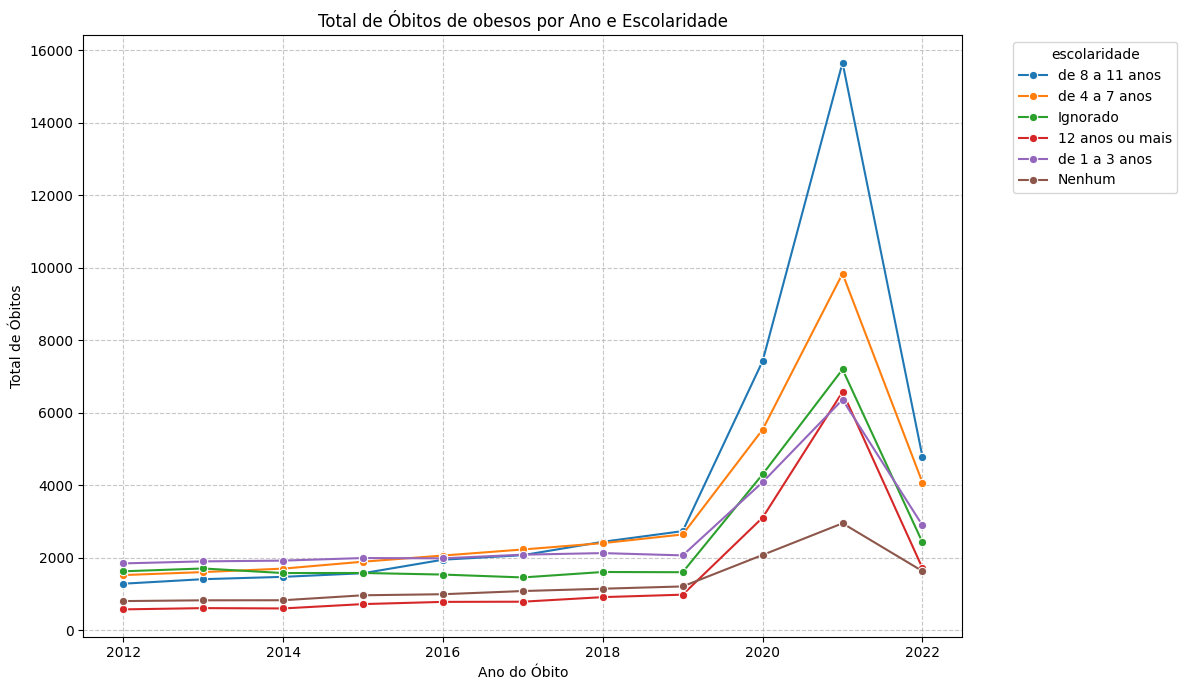

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(data=dataframe, x='ano_obito', y='total_obitos', hue='escolaridade', marker='o')
plt.title('Total de Óbitos de obesos por Ano e Escolaridade')
plt.xlabel('Ano do Óbito')
plt.ylabel('Total de Óbitos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='escolaridade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import quadrosdesaude as qds
import os

# 1. Configurações
caminho_ftp = "/dissemin/publicos/SIM/CID10/DORES/"  # Caminho padrão do SIM no DATASUS
arquivo_alvo = "DORJ2019.dbc"                        # DO = Óbitos, RJ = Rio de Janeiro, 2019 = Ano
pasta_destino = "./dados_downloads"                  # Onde você quer salvar no seu PC

# 2. Executar o download
print(f"Baixando {arquivo_alvo}...")
resultado = qs.ftp_download_arquivo(
    ftp_path=caminho_ftp,
    filename=arquivo_alvo,
    destination_folder=pasta_destino
)

print(resultado)

Renderizando vídeo...
Vídeo salvo com sucesso!


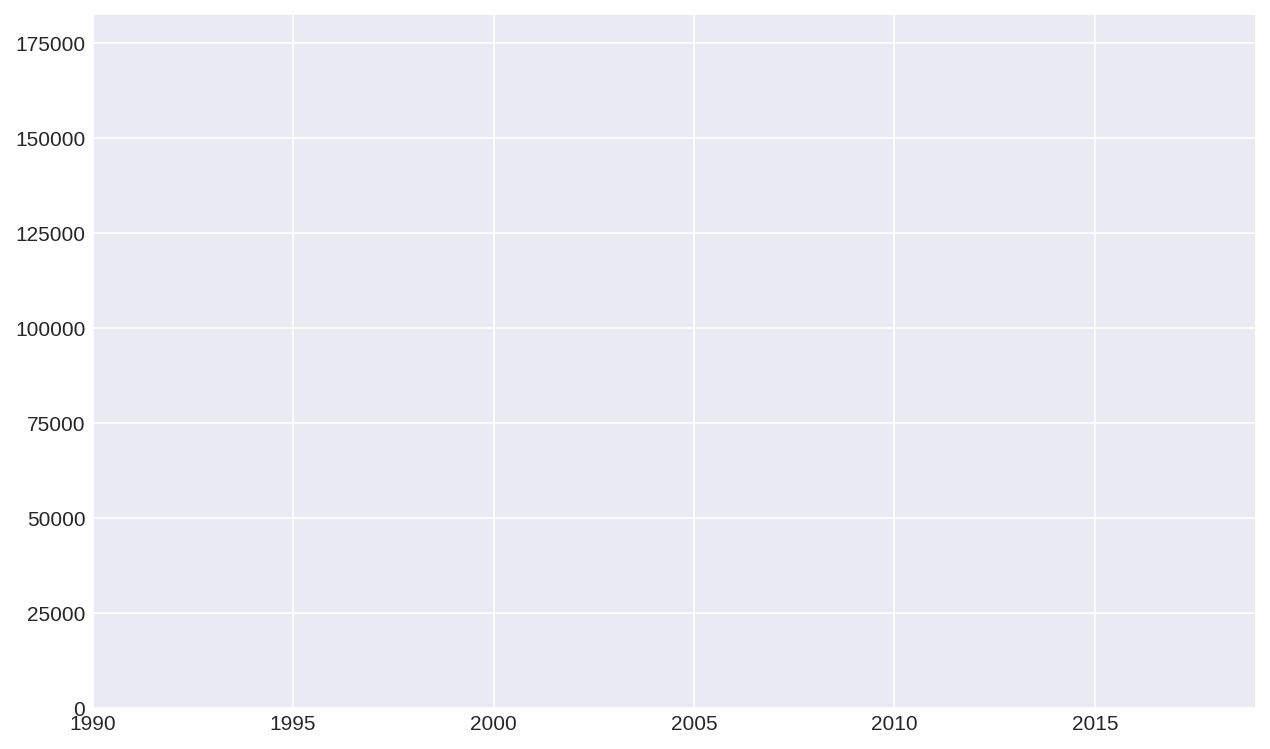

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# 1. Simular dados (Substitua isso pelo seu df_parquet do DATASUS)
# Imagine que carregamos os óbitos totais por ano
anos = np.arange(1990, 2020)
obitos = np.linspace(50000, 150000, len(anos)) + np.random.normal(0, 5000, len(anos))

df = pl.DataFrame({
    "ano": anos,
    "obitos": obitos
})

# 2. Configuração do Estilo "Clean" (Estilo Instagram)
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6), dpi=150) # DPI alto para qualidade

# Definir limites fixos (importante para o gráfico não ficar "dançando")
ax.set_xlim(df["ano"].min(), df["ano"].max())
ax.set_ylim(0, df["obitos"].max() * 1.2)

# Elementos iniciais
line, = ax.plot([], [], lw=4, color='#2563eb') # Linha azul grossa
title = ax.text(0.5, 0.95, "", transform=ax.transAxes, ha="center", fontsize=16, weight='bold')

# Initialize area globally with some placeholder values (it will be removed in init)
area = ax.fill_between([], [], color='#2563eb', alpha=0.1)


# Função de inicialização
def init():
    line.set_data([], [])
    title.set_text("")
    # Remove the initial placeholder area if it exists
    global area
    area.remove()
    # Re-initialize area with empty data; this creates a new PolyCollection that we'll manage
    area = ax.fill_between([], [], color='#2563eb', alpha=0.1)
    return line, title, area # Return all artists that will be updated initially


# 3. A Mágica da Animação (Frame a Frame)
def update(frame):
    # Pega os dados até o índice atual (frame)
    x = df["ano"][:frame]
    y = df["obitos"][:frame]

    # Atualiza a linha
    line.set_data(x, y)

    # Update the area: remove the old one and draw a new one
    global area
    area.remove() # Remove the previous fill_between PolyCollection from the axis
    area = ax.fill_between(x, 0, y, color='#2563eb', alpha=0.2) # Create a new one and assign it back

    # Atualiza título e anotações dinâmicas
    if len(y) > 0:
        val_atual = y[len(y)-1]
        title.set_text(f"Evolução de Óbitos - Ano: {int(x[len(x)-1])}")
    else:
        title.set_text("Evolução de Óbitos") # Default title if no data yet

    return line, title, area # Return all artists that were updated

# Criar a animação
ani = animation.FuncAnimation(
    fig, update, frames=len(df)+1,
    init_func=init, blit=False, interval=100
)

# 4. Salvar em alta qualidade (MP4)
print("Renderizando vídeo...")
# Requer FFmpeg instalado no sistema
ani.save('evolucao_datasus.mp4', writer='ffmpeg', fps=15, dpi=200)
print("Vídeo salvo com sucesso!")

In [ ]:
!pip install bar_chart_race pandas
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import pandas as pd
import bar_chart_race as bcr
import numpy as np

# 1. Simulação de Dados
anos = list(range(2000, 2024))
estados = ['SP', 'RJ', 'MG', 'RS', 'BA']

# Criando dados aleatórios
data = {}
for uf in estados:
    valores = np.cumsum(np.random.randint(1000, 5000, len(anos)))
    data[uf] = valores

df = pd.DataFrame(data, index=anos)

# 2. Configurando os Emojis
mapa_emojis = {
    'SP': 'SP 🏙️',
    'RJ': 'RJ 🏖️',
    'MG': 'MG 🧀',
    'RS': 'RS 🧉',
    'BA': 'BA 🥁'
}
df.columns = [mapa_emojis.get(col, col) for col in df.columns]

# 3. Gerar a Corrida (CORREÇÃO DA FONTE AQUI)
print("Renderizando animação... (aguarde)")

bcr.bar_chart_race(
    df=df,
    filename='corrida_obitos_estados.mp4',
    orientation='h',
    sort='desc',
    n_bars=5,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=20,
    period_length=1000,
    title='Evolução (Dados Simulados)',

    # --- CORREÇÃO DO ERRO ---
    # Usamos 'sans-serif' que funciona em qualquer computador (Windows/Mac/Linux)
    shared_fontdict={'family': 'sans-serif', 'color': '.1'},
    # ------------------------

    bar_label_size=12,
    tick_label_size=12,
    scale='linear',
    bar_kwargs={'alpha': .7},
    filter_column_colors=True
)

print("Pronto! Vídeo salvo como 'corrida_obitos_estados.mp4'")

/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')


Renderizando animação... (aguarde)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:435: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  ret_val = anim.save(self.filename, fps=self.fps, writer=self.writer)
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:435: UserWarning: Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from font(s) DejaVu Sans.
  ret_val = anim.save(self.filename, fps=self.fps, writer=self.writer)
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:435: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  ret_val = anim.save(self.filename, fps=self.fps, writer=self.writer)
/usr/local/lib/python3.12/dist-packages/bar_chart_race/_make_chart.py:435: UserWarning: Glyph 129481 (\N{MATE DRINK}) missing from font(s) DejaVu Sans.
  ret_val = anim.save(self.filename, fps=self.fps, writer=self.writer)
/usr/local/lib/python3.12/dist-packages/bar_cha

Pronto! Vídeo salvo como 'corrida_obitos_estados.mp4'
